### Analyysejä analysointiosaamisen tehtävään 2

In [16]:
# Kirjastojen tuonti
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Kaavioiden tyylimäärittely
plt.style.use('seaborn-whitegrid')

# Datan avaaminen
df=pd.read_excel('https://taanila.fi/t2aineisto.xlsx')
df.head()

,Nro,Rahaston nimi,5 vuoden tuotto (% vuodessa),3 vuoden tuotto (% vuodessa),1 vuoden tuotto,6 kuukauden tuotto,Hallinn. ja säilytyspalkkio (% vuodessa),Rahastoluokka,Unnamed: 8
0,0,Aktia Capital,0.147768,0.154244,0.465292,0.239140,0.0183,EQ_FINLAND,NaN
1,1,Danske Invest Suomi Osake,0.103801,0.082012,0.258951,0.135926,0.0140,EQ_FINLAND,NaN
2,2,Danske Invest Suomi Osake I K,0.111057,0.086038,0.264550,0.138457,0.0095,EQ_FINLAND,NaN
3,3,Danske Invest Suomi Osake I T,NaN,NaN,0.203181,0.138459,0.0095,EQ_FINLAND,NaN
4,4,Danske Invest Suomi Osake IW K,NaN,0.089611,0.268652,0.140304,0.0062,EQ_FINLAND,NaN


In [17]:
# Lyhyemmät nimet muuttujille
df = df.drop(['Nro','Unnamed: 8'], axis = 1)
df.columns=['nimi', 'tuotto 5v', 'tuotto 3v', 'tuotto 1v', 'tuotto 6kk', 'palkkio', 'rahastoluokka']

In [18]:
df['rahastoluokka'].value_counts()

EQ_EUROPE         130
EQ_NORAM           76
EQ_EMER_GLOBAL     65
EQ_FINLAND         41
Name: rahastoluokka, dtype: int64

In [19]:
#Tilastolliset tunnusluvut rahastoluokittain
df.groupby('rahastoluokka').describe().T

rahastoluokka     EQ_EMER_GLOBAL   EQ_EUROPE  EQ_FINLAND   EQ_NORAM
tuotto 5v  count       50.000000   99.000000   31.000000  56.000000
           mean         0.115464    0.070449    0.138151   0.127959
           std          0.042404    0.031336    0.029929   0.043137
           min          0.009906   -0.013309    0.103801   0.046441
           25%          0.083127    0.050894    0.119918   0.101689
           50%          0.120253    0.065634    0.128238   0.133329
           75%          0.144333    0.091471    0.143859   0.142103
           max          0.184510    0.149145    0.228856   0.252100
tuotto 3v  count       55.000000  106.000000   32.000000  64.000000
           mean         0.062489    0.046215    0.118490   0.125485
           std          0.046545    0.043436    0.046280   0.052537
           min         -0.042780   -0.084424    0.072434  -0.005140
           25%          0.034419    0.022237    0.084410   0.098212
           50%          0.063342    0.039966    0.103682   0.132931
           75%          0.093997    0.072663    0.138989   0.146245
           max          0.168937    0.167053    0.232044   0.250350
tuotto 1v  count       62.000000  118.000000   41.000000  68.000000
           mean         0.221118    0.149808    0.321310   0.226086
           std          0.150034    0.133270    0.127469   0.093774
           min         -0.129416   -0.164761    0.193412   0.063169
           25%          0.151496    0.080762    0.227070   0.177597
           50%          0.227849    0.115616    0.264550   0.204915
           75%          0.291561    0.187715    0.356954   0.268515
           max          0.641639    0.704657    0.632435   0.487501
tuotto 6kk count       62.000000  128.000000   41.000000  74.000000
           mean         0.219640    0.133321    0.187825   0.123053
           std          0.077589    0.083932    0.083017   0.072542
           min          0.064567   -0.025124    0.101472   0.022000
           25%          0.174355    0.085009    0.135926   0.078896
           50%          0.202036    0.108598    0.150535   0.092502
           75%          0.255785    0.169515    0.226957   0.157795
           max          0.545381    0.535473    0.378792   0.315195
palkkio    count       65.000000  130.000000   41.000000  76.000000
           mean         0.014248    0.011646    0.011703   0.011324
           std          0.006087    0.005748    0.005981   0.006194
           min          0.002000    0.000000    0.001590   0.000000
           25%          0.009000    0.007500    0.006200   0.005750
           50%          0.015000    0.012000    0.012000   0.010000
           75%          0.019000    0.017450    0.017000   0.018000
           max          0.025000    0.020000    0.020000   0.020000

<AxesSubplot:xlabel='rahastoluokka', ylabel='tuotto 5v'>

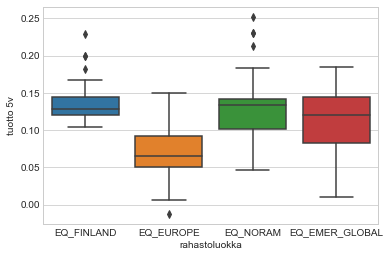

In [20]:
sns.boxplot(x='rahastoluokka', y='tuotto 5v', data=df)

<AxesSubplot:xlabel='rahastoluokka', ylabel='tuotto 3v'>

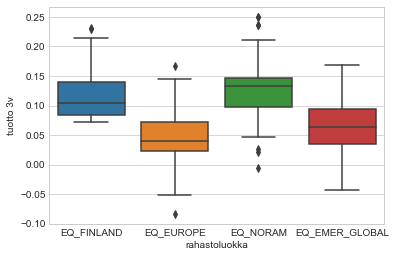

In [21]:
sns.boxplot(x='rahastoluokka', y='tuotto 3v', data=df)

<AxesSubplot:xlabel='rahastoluokka', ylabel='tuotto 1v'>

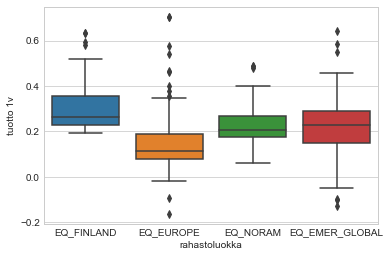

In [22]:
sns.boxplot(x='rahastoluokka', y='tuotto 1v', data=df)

<AxesSubplot:xlabel='rahastoluokka', ylabel='tuotto 6kk'>

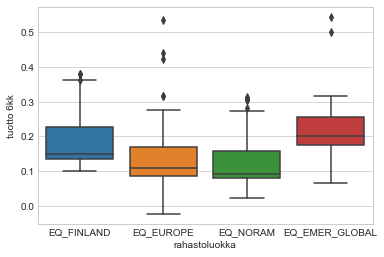

In [23]:
sns.boxplot(x='rahastoluokka', y='tuotto 6kk', data=df)

<AxesSubplot:xlabel='rahastoluokka', ylabel='palkkio'>

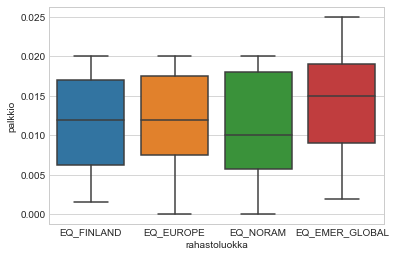

In [24]:
sns.boxplot(x='rahastoluokka', y='palkkio', data=df)

In [25]:
# Korrelaatiokertoimen 1v tuoton ja palkkion välille rahastoluokittain
df.groupby('rahastoluokka')[['tuotto 1v','palkkio']].corr()

tuotto 1v   palkkio
rahastoluokka                                
EQ_EMER_GLOBAL tuotto 1v   1.000000 -0.066699
               palkkio    -0.066699  1.000000
EQ_EUROPE      tuotto 1v   1.000000  0.214141
               palkkio     0.214141  1.000000
EQ_FINLAND     tuotto 1v   1.000000  0.504177
               palkkio     0.504177  1.000000
EQ_NORAM       tuotto 1v   1.000000  0.360961
               palkkio     0.360961  1.000000

In [26]:
# pearsonr-funktion tuonti scipy.stats-kirjastosta
from scipy.stats import pearsonr

# Korrelaatiokertoimet ja p-arvot 1v tuoton ja palkkion välille rahastoluokittain
for luokka in pd.unique(df['rahastoluokka']):
    df_dropna = df[df['rahastoluokka']==luokka].dropna(subset=['tuotto 1v', 'palkkio'])
    corr, p = pearsonr(df_dropna['tuotto 1v'], df_dropna['palkkio'])
    print(luokka, 'korrelaatio %.3f,' %corr, 'p-arvo %.3f' %p)

EQ_FINLAND korrelaatio 0.504, p-arvo 0.001
EQ_EUROPE korrelaatio 0.214, p-arvo 0.020
EQ_NORAM korrelaatio 0.361, p-arvo 0.002
EQ_EMER_GLOBAL korrelaatio -0.067, p-arvo 0.607


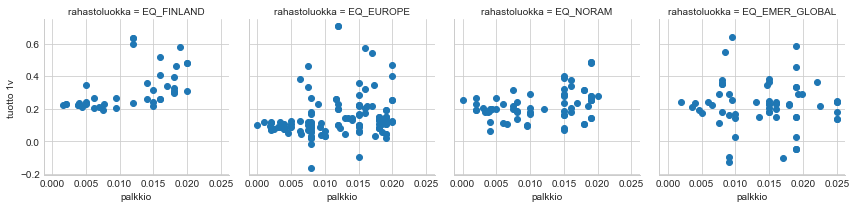

In [27]:
# 1v tuotot ja palkkiot pistekaavioina rahastoluokittain
g = sns.FacetGrid(data=df, col='rahastoluokka')
g = g.map(plt.scatter, 'palkkio', 'tuotto 1v')